## Correction exercices séance 5

À partir des données sur la perception de la science en 2011

1. Obtenir le tableau de répartition de la PCS  (catégorie socio-professionnelle) des enquêtés
2. Calculer la moyenne d'âge par genre
3. Quelle est la catégorie de diplome ayant en moyenne l'indicateur de confiance dans les institutions (confiance_ind) le plus élevé ?
4. Calculer le niveau moyen de culture scientifique (connaissance_sci) selon le genre, puis selon l'intérêt pour la politique
5. Faire une représentation graphique de la répartition des revenus dans l'échantillon.
6. Faire un tableau croisant le niveau de diplome et l'intérêt pour la science
7. Faire un tableau croisant l'intérêt pour la politique et l'intérêt pour la science
8. Regrouper ces 2 tableaux en un, et enregistrez le sous un format Excel
9. Recodez l'âge en catégories (18/25/35/45/55/65/+) en utilisant à la fois la méthode apply, puis en regardant la fonction cut de Pandas

In [1]:
import pandas as pd
import pyshs
df = pd.read_excel("image_science_france_2011_simplifie.xls")

In [2]:
df.shape

(1027, 12)

In [3]:
df.columns

Index(['Unnamed: 0', 'sexe', 'age', 'pcs', 'diplome', 'politique', 'revenus',
       'confiance_ind', 'interetpolitique', 'interetscience', 'apportscience',
       'connaissance_sci'],
      dtype='object')

In [4]:
# rapide aperçu de mes données…

In [5]:
df.describe()

,Unnamed: 0,age,confiance_ind,connaissance_sci
count,1027.000000,1027.000000,1027.000000,1027.000000
mean,513.000000,48.140214,0.548588,13.028238
std,296.613666,17.954073,0.243683,82.190385
min,0.000000,18.000000,0.000000,1.000000
25%,256.500000,33.000000,0.400000,2.000000
50%,513.000000,46.000000,0.600000,3.000000
75%,769.500000,62.000000,0.700000,4.000000
max,1026.000000,88.000000,1.000000,666.000000


In [6]:
df.isnull().sum()

Unnamed: 0            0
sexe                  0
age                   0
pcs                   0
diplome               4
politique           168
revenus             121
confiance_ind         0
interetpolitique      0
interetscience        1
apportscience        14
connaissance_sci      0
dtype: int64

In [7]:
pyshs.description(df)

,Type,Modalités,Mode,Moyenne,Écart-type,Valeurs manquantes
Variable,,,,,,
Unnamed: 0,Numérique,,,513.0,296.61,0
sexe,Catégorielle,2.0,Femme,,,0
age,Numérique,,,48.14,17.95,0
pcs,Catégorielle,7.0,Retraités / Autres inactifs,,,0
diplome,Catégorielle,7.0,Intermédiaire,,,4
politique,Catégorielle,8.0,4,,,168
revenus,Catégorielle,10.0,J - De 1501 à 2300 euros (de 10 001 à 15 000 f...,,,121
confiance_ind,Numérique,,,0.55,0.24,0
interetpolitique,Catégorielle,4.0,Un peu,,,0


In [8]:
# moi y a des choses qui me plaisent pas trop… mais on va y revenir dans les exos

## 1. Obtenir le tableau de répartition de la PCS  (catégorie socio-professionnelle) des enquêtés

In [9]:
# répartition PCS
df["pcs"].value_counts(normalize = True)*100
# pour trier par nom :
# df["pcs"].value_counts(normalize = True).sort_index()*100

Retraités / Autres inactifs                                     46.445959
Employés et Personnels de services                              17.916261
Professions intermédiaires, Techniciens, Contremaitres et Ag    12.852970
Ouvriers                                                        12.658228
Professions libérales et Cadres                                  7.205453
Artisans, Commercants et Chefs d'entreprises                     2.531646
Agriculteurs exploitants                                         0.389484
Name: pcs, dtype: float64

In [10]:
# si je veux arrondir : mettre entre parenthèses ()
(df["pcs"].value_counts(normalize = True)*100).round(2)

Retraités / Autres inactifs                                     46.45
Employés et Personnels de services                              17.92
Professions intermédiaires, Techniciens, Contremaitres et Ag    12.85
Ouvriers                                                        12.66
Professions libérales et Cadres                                  7.21
Artisans, Commercants et Chefs d'entreprises                     2.53
Agriculteurs exploitants                                         0.39
Name: pcs, dtype: float64

In [11]:
# ou alors mettre round avant le *100 (et adapter le nb de décimales conservées):
df["pcs"].value_counts(normalize = True).round(4)*100

Retraités / Autres inactifs                                     46.45
Employés et Personnels de services                              17.92
Professions intermédiaires, Techniciens, Contremaitres et Ag    12.85
Ouvriers                                                        12.66
Professions libérales et Cadres                                  7.21
Artisans, Commercants et Chefs d'entreprises                     2.53
Agriculteurs exploitants                                         0.39
Name: pcs, dtype: float64

In [12]:
# ou avec pyshs
pyshs.tri_a_plat(df, "pcs")

,Effectif,Pourcentage (%)
Agriculteurs exploitants,4.0,0.4
"Artisans, Commercants et Chefs d'entreprises",26.0,2.5
Employés et Personnels de services,184.0,17.9
Ouvriers,130.0,12.7
"Professions intermédiaires, Techniciens, Contremaitres et Ag",132.0,12.9
Professions libérales et Cadres,74.0,7.2
Retraités / Autres inactifs,477.0,46.4
Total,1027.0,100.0


## 2. Calculer la moyenne d'âge par genre

In [13]:
# je regroupe selon le sexe avec groupby et je fais la moyenne d'âge avec mean: 
df.groupby("sexe")["age"].mean()

sexe
Femme    46.061798
Homme    50.391481
Name: age, dtype: float64

## 3. Quelle est la catégorie de diplome ayant en moyenne l'indicateur de confiance dans les institutions (confiance_ind) le plus élevée ?

In [14]:
#confiance_ind moyenne selon le diplome
# je groupe par diplome / je selectione la variable confiance_ind / je fais la moyenne / j'identifie le max :
df.groupby("diplome")["confiance_ind"].mean().idxmax()

'Supérieur médical'

In [15]:
# ou je peux aller regarder directement dans le regroupement réalisé
df.groupby("diplome")["confiance_ind"].mean().sort_values(ascending=False)

diplome
Supérieur médical         0.680000
Supérieur scientifique    0.626804
Supérieur                 0.587374
Secondaire                0.542935
Intermédiaire             0.524207
Primaire                  0.493605
Name: confiance_ind, dtype: float64

## 4. Calculer le niveau moyen de culture scientifique (connaissance_sci) selon le genre, puis selon l'intérêt pour la politique

In [16]:
# calcul connaissance_sci moyenne selon sexe et l'intérêt politique
# groupby me permet de passer plusieurs variables de regroupement : .groupby(["var1","var2"])
df.groupby(["sexe", "interetpolitique"])["connaissance_sci"].mean()

sexe   interetpolitique
Femme  Beaucoup            10.375000
       Pas du tout          8.910000
       Très peu            22.931298
       Un peu              18.069767
Homme  Beaucoup             7.012346
       Pas du tout         23.444444
       Très peu            24.540984
       Un peu               2.787440
Name: connaissance_sci, dtype: float64

In [17]:
# les résultats semblent surprenants, je fais des tests.

In [18]:
df["connaissance_sci"].value_counts()

3      358
2      271
4      242
1      140
666     16
Name: connaissance_sci, dtype: int64

In [19]:
# emilien a visiblement intégré l'antéchrist dans ses données.
# soit il tente de nous piéger, soit c'était un recodage volontairement abérant pour exclure des données.
# dans ce cas soit on creuse, soit on demande au responsable.

In [20]:
# faire le traitement en live
df["connaissance_sci"].unique()

array([  3,   2,   4,   1, 666])

In [21]:
df["recodage_conn"] = df["connaissance_sci"].replace(666, None)

In [22]:
df.groupby(["sexe", "interetpolitique"])["recodage_conn"].mean()

sexe   interetpolitique
Femme  Beaucoup            2.829545
       Pas du tout         2.260000
       Très peu            2.656489
       Un peu              2.651163
Homme  Beaucoup            2.919753
       Pas du tout         2.412698
       Très peu            2.803279
       Un peu              2.787440
Name: recodage_conn, dtype: float64

## 5. Faire une représentation graphique de la répartition des revenus dans l'échantillon.

<AxesSubplot:>

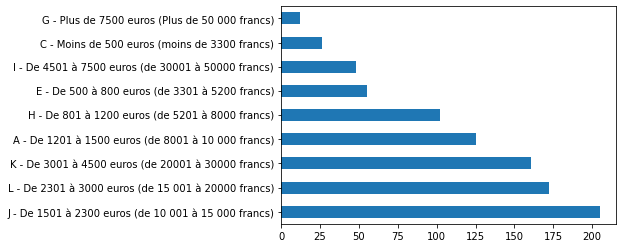

In [23]:
# 5. Faire une représentation graphique de la répartition des revenus dans l'échantillon.
df["revenus"].value_counts().plot(kind = "barh")

## 6. Faire un tableau croisant le niveau de diplome et l'intérêt pour la science

In [24]:
#6. Faire un tableau croisant le niveau de diplome et l'intérêt pour la science
pd.crosstab(df["diplome"], df["interetscience"])

interetscience,Non,Oui
diplome,,
Intermédiaire,201,146
Primaire,103,69
Secondaire,74,110
Supérieur,71,126
Supérieur médical,7,18
Supérieur scientifique,8,89


In [25]:
# En mieux
t1 = pd.crosstab(df["diplome"], df["interetscience"],normalize="index",margins=True)*100
t1

interetscience,Non,Oui
diplome,,
Intermédiaire,57.925072,42.074928
Primaire,59.883721,40.116279
Secondaire,40.217391,59.782609
Supérieur,36.040609,63.959391
Supérieur médical,28.000000,72.000000
Supérieur scientifique,8.247423,91.752577
All,45.401174,54.598826


## 7. Faire un tableau croisant l'intérêt pour la politique et l'intérêt pour la science

In [26]:
# 7. Faire un tableau croisant l'intérêt pour la politique et l'intérêt pour la science
t2 = pd.crosstab(df["interetpolitique"], df["interetscience"],normalize="index",margins=True)*100
t2

interetscience,Non,Oui
interetpolitique,,
Beaucoup,24.497992,75.502008
Pas du tout,68.098160,31.901840
Très peu,58.854167,41.145833
Un peu,42.890995,57.109005
All,45.419103,54.580897


## 8. Regrouper ces 2 tableaux en un, et enregistrez le sous un format Excel

In [27]:
# 8. Regrouper ces 2 tableaux en 1 seul
pd.concat([t1, t2])

interetscience,Non,Oui
Intermédiaire,57.925072,42.074928
Primaire,59.883721,40.116279
Secondaire,40.217391,59.782609
Supérieur,36.040609,63.959391
Supérieur médical,28.000000,72.000000
Supérieur scientifique,8.247423,91.752577
All,45.401174,54.598826
Beaucoup,24.497992,75.502008
Pas du tout,68.098160,31.901840
Très peu,58.854167,41.145833


In [28]:
# on peut améliorer la mise en forme en utilisant un dictionaire : {"Nom1" : tableau1, "Nom2" : tableau2}
pd.concat({"Diplome" : t1, "Intérêt politique" : t2})

interetscience                                  Non        Oui
Diplome           Intermédiaire           57.925072  42.074928
                  Primaire                59.883721  40.116279
                  Secondaire              40.217391  59.782609
                  Supérieur               36.040609  63.959391
                  Supérieur médical       28.000000  72.000000
                  Supérieur scientifique   8.247423  91.752577
                  All                     45.401174  54.598826
Intérêt politique Beaucoup                24.497992  75.502008
                  Pas du tout             68.098160  31.901840
                  Très peu                58.854167  41.145833
                  Un peu                  42.890995  57.109005
                  All                     45.419103  54.580897

In [29]:
# la même chose avec pyshs :
pyshs.tableau_croise_multiple(df,"interetscience", ["diplome", "interetpolitique"])

Attention, les totaux par tableaux sont différents (valeurs manquantes)


Non          Oui  \
Variable                     Modalités                                          
diplome (p = 0.000)          Intermédiaire           201 (57.9%)  146 (42.1%)   
                             Primaire                103 (59.9%)   69 (40.1%)   
                             Secondaire               74 (40.2%)  110 (59.8%)   
                             Supérieur                71 (36.0%)  126 (64.0%)   
                             Supérieur médical         7 (28.0%)   18 (72.0%)   
                             Supérieur scientifique     8 (8.2%)   89 (91.8%)   
                             Total                   464 (45.4%)  558 (54.6%)   
interetpolitique (p = 0.000) Beaucoup                 61 (24.5%)  188 (75.5%)   
                             Pas du tout             111 (68.1%)   52 (31.9%)   
                             Très peu                113 (58.9%)   79 (41.1%)   
                             Un peu                  181 (42.9%)  241 (57.1%)   
                             Total                   466 (45.4%)  560 (54.6%)   

                                                           Total  \
Variable                     Modalités                             
diplome (p = 0.000)          Intermédiaire            347 (100%)   
                             Primaire                 172 (100%)   
                             Secondaire               184 (100%)   
                             Supérieur                197 (100%)   
                             Supérieur médical         25 (100%)   
                             Supérieur scientifique    97 (100%)   
                             Total                   1022 (100%)   
interetpolitique (p = 0.000) Beaucoup                 249 (100%)   
                             Pas du tout              163 (100%)   
                             Très peu                 192 (100%)   
                             Un peu                   422 (100%)   
                             Total                   1026 (100%)   

                                                            Distribution  
Variable                     Modalités                                    
diplome (p = 0.000)          Intermédiaire                         33.9%  
                             Primaire                              16.8%  
                             Secondaire                            18.0%  
                             Supérieur                             19.4%  
                             Supérieur médical                      2.4%  
                             Supérieur scientifique                 9.5%  
                             Total                                100.0%  
interetpolitique (p = 0.000) Beaucoup                              24.3%  
                             Pas du tout                           15.9%  
                             Très peu                              18.7%  
                             Un peu                                41.1%  
                             Total                   100.00000000000001%

### (8. suite) Enregistrer la sorie sous excel 

In [30]:
# j'utilise .to_excel("nom_souhaité")

# pour la version pd.concat :
pd.concat({"Diplome" : t1, "Intérêt politique" : t2}).to_excel("tableau_groupe.xlsx")
# idem pour la version pyshs : 
pyshs.tableau_croise_multiple(df,"interetscience", ["diplome", "interetpolitique"]).to_excel("tableau_pyshs.xlsx")

Attention, les totaux par tableaux sont différents (valeurs manquantes)


## 9. Recodez l'âge en catégories (18/25/35/45/55/65/+) en utilisant à la fois la méthode apply, puis en regardant la fonction cut de Pandas

In [31]:
# ICI : la question peut se poser de savoir comment on souhaiter gérer les bornes.
# je veux que les <25 ? ou je veux aussi ceux de 25 ?
# -> les moins de 25 (jusqu'à 24), puis les 25-34, 35-45, etc. ?
# -> ou les 18-25 puis les 26-35, etc. ?
# pour faciliter la comparaison avec pd.cut je pars sur <= 25, etc.

def recodage_age(entree):
    if entree <=25:
        return "18 à 25"
    elif entree <=35:
        return "26 à 35"
    elif entree<=45:
        return "36 à 45"
    elif entree <=55:
        return "46 à 55"
    elif entree <=65:
        return "56 à 65"
    else:
        return "66 et plus"

In [32]:
#test
for i in [20, 30, 40, 50, 60, 70]:
    print(recodage_age(i))

18 à 25
26 à 35
36 à 45
46 à 55
56 à 65
66 et plus


In [33]:
df["age_recod1"] = df["age"].apply(recodage_age)

In [34]:
df["age_recod1"].value_counts()

56 à 65       201
36 à 45       200
66 et plus    185
26 à 35       180
46 à 55       141
18 à 25       120
Name: age_recod1, dtype: int64

## Documentation pd.cut : 
pd.cut(
    x,
    bins,
    right: bool = True,
    labels=None,
    retbins: bool = False,
    precision: int = 3,
    include_lowest: bool = False,
    duplicates: str = 'raise',
    ordered: bool = True,
)

Docstring:
Bin values into discrete intervals.

Use `cut` when you need to segment and sort data values into bins. This
function is also useful for going from a continuous variable to a
categorical variable. For example, `cut` could convert ages to groups of
age ranges. Supports binning into an equal number of bins, or a
pre-specified array of bins.


In [35]:
# Pour la dernière catégorie : pensez à vérifier l'age max avant de fixer vos bornes
df["age_recod2"] = pd.cut(x=df["age"], bins=[18, 25, 35, 45, 55, 65, 99])
df["age_recod2"].value_counts()

(55, 65]    201
(35, 45]    200
(65, 99]    185
(25, 35]    180
(45, 55]    141
(18, 25]    113
Name: age_recod2, dtype: int64

In [36]:
# ici petit souci : nos 18 ans ne sont pas pris en compte.
# je peux feinter en prenant une première borne à 17 ans.
# ou alors en précisant le comportement souhaité dans les paramètres de pd.cut
# de base : right=True / include_lowest=False

In [37]:
# si je veux ajouter des labels :
df["age_recod2"] = pd.cut(x=df["age"],
                          bins=[17, 25, 35, 45, 55, 65, 99],
                          labels=["18 à 25", "25 à 35", "35 à 45", "45 à 55", "55 à 65", "65 et plus"])
# faire une sortie pour comparer
df["age_recod2"].value_counts()

55 à 65       201
35 à 45       200
65 et plus    185
25 à 35       180
45 à 55       141
18 à 25       120
Name: age_recod2, dtype: int64

### Exemples de comportement avec right et include_lowest

In [38]:
# Exemple :
# comportement de base mais en faisant appraitre right et include_lowest pour l'explication
# j'enlève les labels pour voir les catégories créées

df["age_recod3"] = pd.cut(x=df["age"],
                          bins=[18, 25, 35, 45, 55, 65, 99],
                          right=True,
                          include_lowest=False)

df["age_recod3"].value_counts()
# ici : (18, 25]    113

(55, 65]    201
(35, 45]    200
(65, 99]    185
(25, 35]    180
(45, 55]    141
(18, 25]    113
Name: age_recod3, dtype: int64

In [39]:
# exemple : include_lowest=True
df["age_recod4"] = pd.cut(x=df["age"],
                          bins=[18, 25, 35, 45, 55, 65, 99],
                          right=True,
                          include_lowest=True)

df["age_recod4"].value_counts()
# ici (17.999, 25.0]    120

(55.0, 65.0]      201
(35.0, 45.0]      200
(65.0, 99.0]      185
(25.0, 35.0]      180
(45.0, 55.0]      141
(17.999, 25.0]    120
Name: age_recod4, dtype: int64

In [40]:
# exemple : right=false (dans ce cas la valeur de include_lowest n'influence pas)
df["age_recod5"] = pd.cut(x=df["age"],
                          bins=[18, 25, 35, 45, 55, 65, 99],
                          right=False,
                          include_lowest=False)

df["age_recod5"].value_counts()

[65, 99)    206
[55, 65)    196
[35, 45)    194
[25, 35)    185
[45, 55)    144
[18, 25)    102
Name: age_recod5, dtype: int64

### différence entre les recodages

In [41]:
# Si l'on veut vérifier l'équivalence entre les recodages : age1 et 4
pyshs.tableau_croise(df,"age_recod1","age_recod4")

age_recod4,"(17.999, 25.0]","(25.0, 35.0]","(35.0, 45.0]","(45.0, 55.0]","(55.0, 65.0]","(65.0, 99.0]",All
age_recod1,,,,,,,
18 à 25,120 (100.0%),0 (0.0%),0 (0.0%),0 (0.0%),0 (0.0%),0 (0.0%),120 (100%)
26 à 35,0 (0.0%),180 (100.0%),0 (0.0%),0 (0.0%),0 (0.0%),0 (0.0%),180 (100%)
36 à 45,0 (0.0%),0 (0.0%),200 (100.0%),0 (0.0%),0 (0.0%),0 (0.0%),200 (100%)
46 à 55,0 (0.0%),0 (0.0%),0 (0.0%),141 (100.0%),0 (0.0%),0 (0.0%),141 (100%)
56 à 65,0 (0.0%),0 (0.0%),0 (0.0%),0 (0.0%),201 (100.0%),0 (0.0%),201 (100%)
66 et plus,0 (0.0%),0 (0.0%),0 (0.0%),0 (0.0%),0 (0.0%),185 (100.0%),185 (100%)
All,120 (11.7%),180 (17.5%),200 (19.5%),141 (13.7%),201 (19.6%),185 (18.0%),1027 (100%)


In [42]:
# suite Si l'on veut vérifier l'équivalence entre les recodages : diff entre age 4 et 5
pyshs.tableau_croise(df,"age_recod4","age_recod5")

age_recod5,"[18, 25)","[25, 35)","[35, 45)","[45, 55)","[55, 65)","[65, 99)",All
age_recod4,,,,,,,
"(17.999, 25.0]",102 (85.0%),18 (15.0%),0 (0.0%),0 (0.0%),0 (0.0%),0 (0.0%),120 (100%)
"(25.0, 35.0]",0 (0.0%),167 (92.8%),13 (7.2%),0 (0.0%),0 (0.0%),0 (0.0%),180 (100%)
"(35.0, 45.0]",0 (0.0%),0 (0.0%),181 (90.5%),19 (9.5%),0 (0.0%),0 (0.0%),200 (100%)
"(45.0, 55.0]",0 (0.0%),0 (0.0%),0 (0.0%),125 (88.7%),16 (11.3%),0 (0.0%),141 (100%)
"(55.0, 65.0]",0 (0.0%),0 (0.0%),0 (0.0%),0 (0.0%),180 (89.6%),21 (10.4%),201 (100%)
"(65.0, 99.0]",0 (0.0%),0 (0.0%),0 (0.0%),0 (0.0%),0 (0.0%),185 (100.0%),185 (100%)
All,102 (9.9%),185 (18.0%),194 (18.9%),144 (14.0%),196 (19.1%),206 (20.1%),1027 (100%)
